In [1]:
import numpy as np
np.random.seed(123)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Dropout,Activation,Flatten

In [4]:
from keras.layers import Conv2D, MaxPooling2D

In [5]:
from keras.utils import np_utils

In [6]:
import requests
requests.packages.urllib3.disable_warnings()

In [7]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [8]:
print(X_train.shape)

(60000, 28, 28)


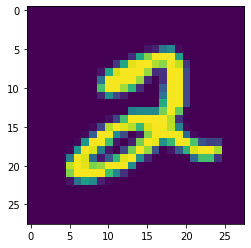

In [9]:
from matplotlib import pyplot as plt
plt.imshow(X_train[5])

In [10]:
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [11]:
print(X_train.shape)

(60000, 1, 28, 28)


In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/= 255
X_test/=255

In [13]:
print(y_train.shape)

(60000,)


In [14]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [15]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

In [16]:
print(Y_train.shape)

(60000, 10)


In [17]:
model = Sequential()

In [18]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [19]:
model.add(Conv2D(512,(3,3),activation='relu',input_shape=(1,28,28)))

In [20]:
print(model.output_shape)

(None, 512, 26, 26)


In [21]:
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [22]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model_log = model.fit(X_test, Y_test, batch_size=32, epochs=3, verbose=1,validation_split=0.33)

Train on 6699 samples, validate on 3301 samples
Epoch 1/3
